# サンプル
- http://matplotlib.org/examples/animation/simple_anim.html

<IPython.core.display.Javascript object>


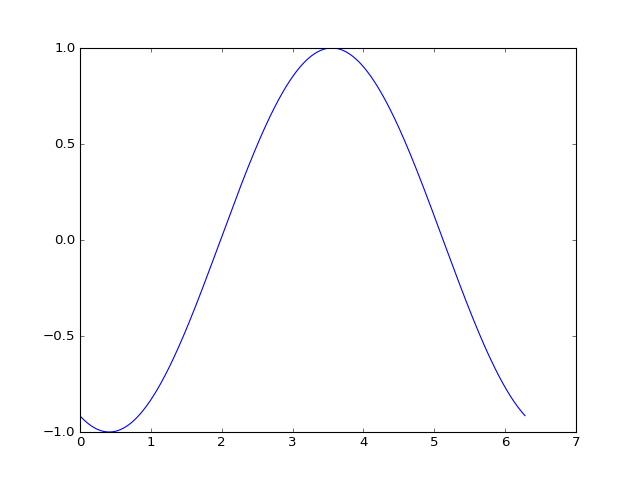

In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

# アニメーション

**このコードは Jupyter 上でアニメーションとして動かない**.
Spyder やターミナルからの直接実行でなら実行できる.

<IPython.core.display.Javascript object>


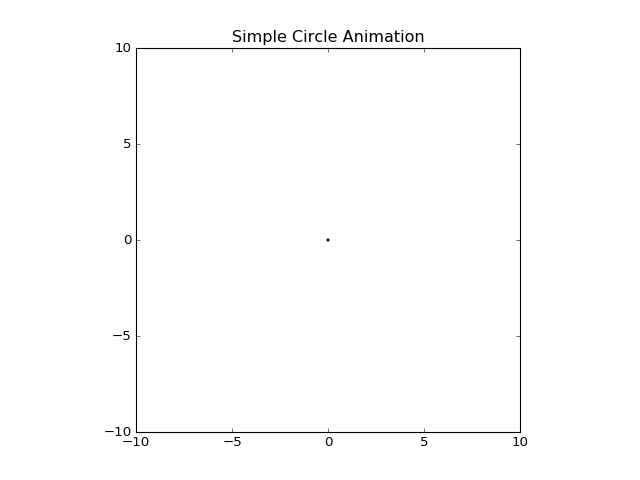

In [2]:
%matplotlib nbagg
from matplotlib import pyplot as plt
from matplotlib import animation
def create_circle():
    circle = plt.Circle((0, 0), 0.05)
    return circle

def update_radius(i, circle):
    circle.radius = i*0.5
    return circle,

def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    anim = animation.FuncAnimation(
        fig, update_radius, fargs = (circle,), frames=30, interval=50)
    plt.title('Simple Circle Animation')
    plt.show()

if __name__ == '__main__':
    create_animation()

**下記コードは Jupyter 上でアニメーションとして動かない**.
Spyder やターミナルからの直接実行でなら実行できる.

<IPython.core.display.Javascript object>


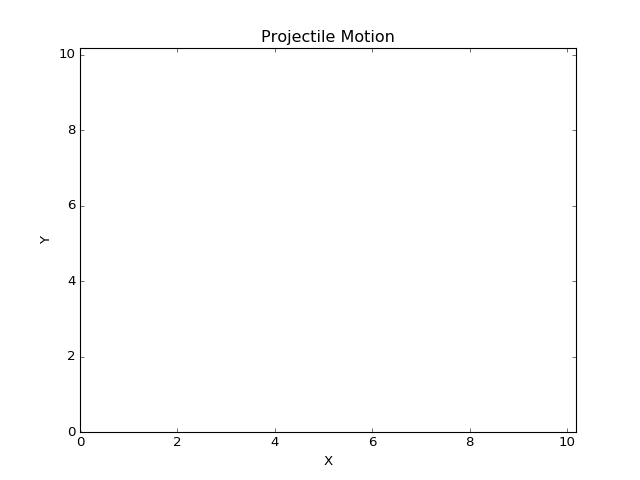

In [3]:
%matplotlib nbagg
from matplotlib import pyplot as plt
from matplotlib import animation
import math

# 重力定数
g = 9.8

def get_intervals(u, theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    return intervals

def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    circle.center = x, y
    return circle,

def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.gcf()
    
    # 縦横比を合わせる
    axis_max = max(xmax, ymax)
    ax = plt.axes(xlim=(xmin, axis_max), ylim=(ymin, axis_max))

    circle = plt.Circle((xmin, ymin), 1.0)
    circle.radius = max(xmax, ymax) / 500
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_position,
                                   fargs=(circle, intervals, u, theta),
                                    frames=len(intervals), interval=1,
                                    repeat=False)
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

u = 10
theta = 45
theta = math.radians(theta)
create_animation(u, theta)